## K近邻算法

使用sklearn库来进行K近邻算法的运算

In [8]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel('葡萄酒.xlsx')
# 特征变量和目标变量的切分
X_train = df[['酒精含量(%)','苹果酸含量(%)']]
y_train = df['分类']  
df

,原始样本,酒精含量(%),苹果酸含量(%),分类
0,样本1,5,2,0
1,样本2,6,1,0
2,样本3,4,1,0
3,样本4,8,3,1
4,样本5,10,2,1


In [9]:
# 模型训练
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=3)  
knn.fit(X_train, y_train)
# 模型预测：预测多个样本
X_test = [[7, 1], [8, 3],[7, 3]]  # 这里能帮助理解为什么要写成二维数组的样式
answer = knn.predict(X_test)  
print(answer)

[0 1 0]


编写代码实现K近邻算法。其中距离计算使用了欧氏距离，同时提供了计算马氏距离的实现代码（第7行到第9行）：

In [10]:
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
import numpy as np
import operator

def classify(inX, dataSet, labels, k):
    #S=np.cov(dataSet.T)   #协方差矩阵，为计算马氏距离
    #SI = np.linalg.inv(S)  #协方差矩阵的逆矩阵
    #distances = np.array(distance.cdist(dataSet, [inX], 'mahalanobis', VI=SI)).reshape(-1)
    distances = np.array(distance.cdist(dataSet, [inX], 'euclidean').reshape(-1))
    sortedDistIndicies = distances.argsort() # 取排序的索引，用于label排序
    classCount={}
    for i in range(k): # 访问距离最近的k个实例
        voteILabel = labels[sortedDistIndicies[i]]
        classCount[voteILabel]=classCount.get(voteILabel,0)+1
    sortedClassCount = sorted(classCount.items(), 
             key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0] # 取最多的分类

ret = [classify(X_test[i], X_train, y_train, 3) for i in range(len(X_test))]

print(ret)

[0, 1, 0]


## SVM算法

trian pred:0.967
test pred:1.000
[[5.  3.5 1.6 0.6]
 [4.3 3.  1.1 0.1]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [4.5 2.3 1.3 0.3]
 [5.1 3.3 1.7 0.5]
 [5.2 4.1 1.5 0.1]
 [5.8 4.  1.2 0.2]
 [5.4 3.  4.5 1.5]
 [5.2 2.7 3.9 1.4]
 [6.  2.7 5.1 1.6]
 [5.  2.  3.5 1. ]
 [6.3 3.3 4.7 1.6]
 [7.  3.2 4.7 1.4]
 [6.  3.4 4.5 1.6]
 [5.6 2.9 3.6 1.3]
 [6.1 3.  4.6 1.4]
 [6.9 3.1 4.9 1.5]
 [5.1 2.5 3.  1.1]
 [6.2 2.2 4.5 1.5]
 [5.7 2.8 4.5 1.3]
 [5.7 2.6 3.5 1. ]
 [6.3 2.5 4.9 1.5]
 [6.7 3.  5.  1.7]
 [5.9 3.2 4.8 1.8]
 [6.3 2.3 4.4 1.3]
 [6.1 3.  4.9 1.8]
 [6.9 3.1 5.1 2.3]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [5.9 3.  5.1 1.8]
 [7.2 3.6 6.1 2.5]
 [6.5 3.2 5.1 2. ]
 [6.2 3.4 5.4 2.3]
 [7.2 3.  5.8 1.6]
 [7.7 2.6 6.9 2.3]
 [7.9 3.8 6.4 2. ]
 [6.  3.  4.8 1.8]
 [6.3 3.4 5.6 2.4]
 [7.7 3.8 6.7 2.2]]
[ 8 18 18]


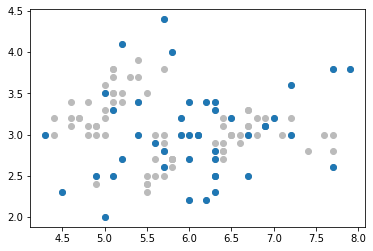

In [11]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
X = iris.data  # 获取自变量
y = iris.target  # 获取因变量
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
clf = svm.SVC(C=0.8, kernel='rbf', gamma=1) # 高斯核，松弛度0.8
#clf = svm.SVC(C=0.5, kernel='linear') # 线性核，松弛度0.5
clf.fit(X_train, y_train.ravel())

print('trian pred:%.3f' %(clf.score(X_train, y_train))) # 对训练集打分
print('test pred:%.3f' %(clf.score(X_test, y_test))) # 对测试集打分
print(clf.support_vectors_) #支持向量列表，从中看到切分边界
print(clf.n_support_) # 每类别持向量个数

plt.plot(X_train[:,0], X_train[:,1],'o', color = '#bbbbbb')
plt.plot(clf.support_vectors_[:,0], clf.support_vectors_[:,1],'o')